In [13]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df=pd.read_csv('adult.csv')/kaggle/input/playground-series-s4e3/sample_submission.csv

In [15]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [16]:
df.mean()

/var/folders/03/hl5pnfws1kb76_gvpg5r1v0w0000gn/T/ipykernel_1119/3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


age                    38.643585
fnlwgt             189664.134597
educational-num        10.078089
capital-gain         1079.067626
capital-loss           87.502314
hours-per-week         40.422382
dtype: float64

In [17]:
df['workclass'].unique(),df['education'].unique(),df['marital-status'].unique(),df['occupation'].unique(),


(array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
        'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
       dtype=object),
 array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
        'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
        '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
       dtype=object),
 array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
        'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
       dtype=object),
 array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
        'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
        'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
        'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
       dtype=object))

In [18]:
#All education from 1st to 12th are grouped with HS-grad from

In [19]:
df['education'].replace('11th','HS-grad',inplace=True)
df['education'].replace('10th','HS-grad',inplace=True)
df['education'].replace('7th-8th','HS-grad',inplace=True)
df['education'].replace('5th-6th','HS-grad',inplace=True)
df['education'].replace('9th','HS-grad',inplace=True)
df['education'].replace('12th','HS-grad',inplace=True)
df['education'].replace('1st-4th','HS-grad',inplace=True)

In [20]:
df['education'].unique()

array(['HS-grad', 'Assoc-acdm', 'Some-college', 'Prof-school',
       'Bachelors', 'Masters', 'Doctorate', 'Assoc-voc', 'Preschool'],
      dtype=object)

In [21]:
df['workclass'].replace('?',np.nan,inplace=True)

In [22]:
df['workclass'].unique()

array(['Private', 'Local-gov', nan, 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [23]:
df['workclass'].isna().sum()

2799

In [24]:
df.dropna(axis=0,inplace=True)

In [25]:
df['workclass'].isna().sum()

0

In [26]:
df['relationship'].unique(),df['race'].unique(),df['native-country'].unique()

(array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
        'Other-relative'], dtype=object),
 array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
        'Amer-Indian-Eskimo'], dtype=object),
 array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
        'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
        'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
        'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
        'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
        'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
        'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
        'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
        'Holand-Netherlands'], dtype=object))

In [27]:
df.drop('fnlwgt',axis=1,inplace=True)

In [28]:
male=pd.get_dummies(df['gender'],drop_first=True)

In [29]:
male

,Male
0,1
1,1
2,1
3,1
5,1
...,...
48837,0
48838,1
48839,0
48840,1


In [30]:
df.drop('gender',axis=1,inplace=True)

In [31]:
dict_income={'>50K':0,'<=50K':1}
df['income']=[dict_income[g] for g in df['income']]

In [32]:
from sklearn.preprocessing import LabelEncoder
lecoder=LabelEncoder()

In [33]:
df['workclass']=lecoder.fit_transform(df['workclass'])
df['education']=lecoder.fit_transform(df['education'])
df['marital-status']=lecoder.fit_transform(df['marital-status'])
df['occupation']=lecoder.fit_transform(df['occupation'])
df['relationship']=lecoder.fit_transform(df['relationship'])
df['race']=lecoder.fit_transform(df['race'])
df['native-country']=lecoder.fit_transform(df['native-country'])

In [34]:
df



,age,workclass,education,educational-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,4,7,4,7,3,2,0,0,40,39,1
1,38,3,4,9,2,5,0,4,0,0,50,39,1
2,28,1,0,12,2,11,0,4,0,0,40,39,0
3,44,3,8,10,2,7,0,2,7688,0,40,39,0
5,34,3,4,6,4,8,1,4,0,0,30,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,0,12,2,13,5,4,0,0,38,39,1
48838,40,3,4,9,2,7,0,4,0,0,40,39,0
48839,58,3,4,9,6,1,4,4,0,0,40,39,1
48840,22,3,4,9,4,1,3,4,0,0,20,39,1


In [35]:
df=pd.concat([df,male],axis=1)

In [36]:
df

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,income,Male
0,25,3,4,7,4,7,3,2,0,0,40,39,1,1
1,38,3,4,9,2,5,0,4,0,0,50,39,1,1
2,28,1,0,12,2,11,0,4,0,0,40,39,0,1
3,44,3,8,10,2,7,0,2,7688,0,40,39,0,1
5,34,3,4,6,4,8,1,4,0,0,30,39,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,0,12,2,13,5,4,0,0,38,39,1,0
48838,40,3,4,9,2,7,0,4,0,0,40,39,0,1
48839,58,3,4,9,6,1,4,4,0,0,40,39,1,0
48840,22,3,4,9,4,1,3,4,0,0,20,39,1,1


[]

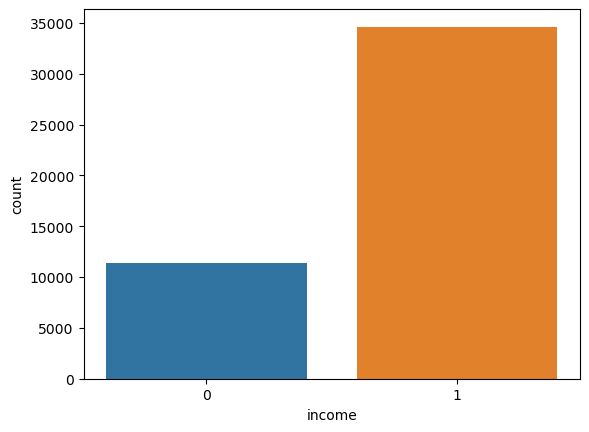

In [37]:
sns.countplot(x=df['income'])
plt.plot()

[]

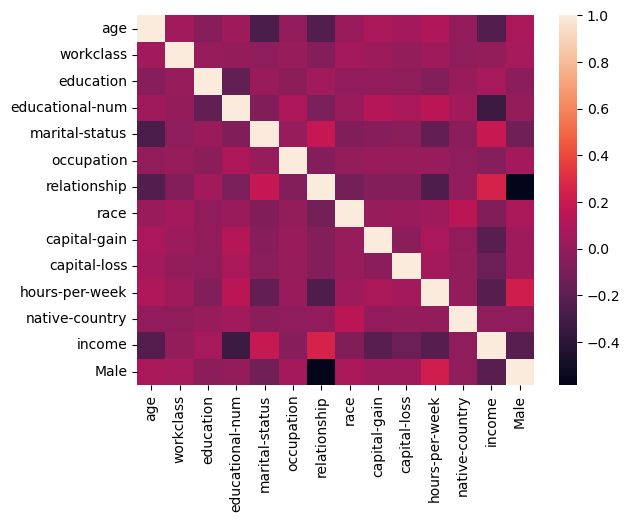

In [39]:
sns.heatmap(df.corr())
plt.plot()

In [40]:
y=df['income']

In [41]:
df.drop('income',axis=1,inplace=True)

In [42]:
X=df

In [43]:
X

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,Male
0,25,3,4,7,4,7,3,2,0,0,40,39,1
1,38,3,4,9,2,5,0,4,0,0,50,39,1
2,28,1,0,12,2,11,0,4,0,0,40,39,1
3,44,3,8,10,2,7,0,2,7688,0,40,39,1
5,34,3,4,6,4,8,1,4,0,0,30,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,0,12,2,13,5,4,0,0,38,39,0
48838,40,3,4,9,2,7,0,4,0,0,40,39,1
48839,58,3,4,9,6,1,4,4,0,0,40,39,0
48840,22,3,4,9,4,1,3,4,0,0,20,39,1


In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [52]:
from sklearn.preprocessing import StandardScaler
stds=StandardScaler()

In [55]:
#Scaling your data
X_train_stds=stds.fit_transform(X_train)
X_test_stds=stds.fit_transform(X_test)

In [56]:
X_train_stds

array([[ 2.37566593, -0.08942615, -1.04177907, ..., -0.49361258,
         0.28941351,  0.69234133],
       [ 3.055335  ,  0.78568619, -0.1637914 , ...,  0.33792836,
         0.28941351,  0.69234133],
       [-1.02267944, -0.08942615, -0.1637914 , ..., -0.07784211,
         0.28941351, -1.44437426],
       ...,
       [ 0.03458356, -0.08942615,  1.59218395, ..., -0.07784211,
         0.28941351, -1.44437426],
       [-1.47579216, -0.08942615, -0.1637914 , ..., -2.15669446,
         0.28941351,  0.69234133],
       [ 1.09184657,  0.78568619, -1.91976674, ...,  0.33792836,
         0.28941351,  0.69234133]])

In [74]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(penalty='l2')

In [75]:
model.fit(X_train_stds,y_train)

LogisticRegression()

In [76]:
model.score(X_test_stds,y_test)

0.8213703985231838

In [77]:
prediction=model.predict(X_test_stds)

In [78]:
prediction

array([1, 0, 1, ..., 1, 1, 1])

In [80]:
y_test

23809    1
12677    1
567      1
33197    1
46792    1
        ..
16345    1
28776    1
18188    1
17403    1
33252    0
Name: income, Length: 9209, dtype: int64

In [89]:
from sklearn.metrics import confusion_matrix,f1_score

In [84]:
confusion_matrix(y_test,prediction)

array([[1018, 1220],
       [ 425, 6546]])

In [86]:
f1_score(y_test,prediction)

0.888376195969329